In [73]:

import PIL
images = [ PIL.Image.open(f) for f in glob('blur_data/*')  ]

def img2array(im):
    if im.mode != 'RGB':
        im = im.convert(mode='RGB')
    return np.fromstring(im.tobytes(), dtype='uint8').reshape((im.size[1], im.size[0], 3))

np_images = [ img2array(im) for im in images ]

In [74]:
def plot_gallery(title, images, n_col, n_row,image_shape = (28, 28)):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,            
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    plt.show()   

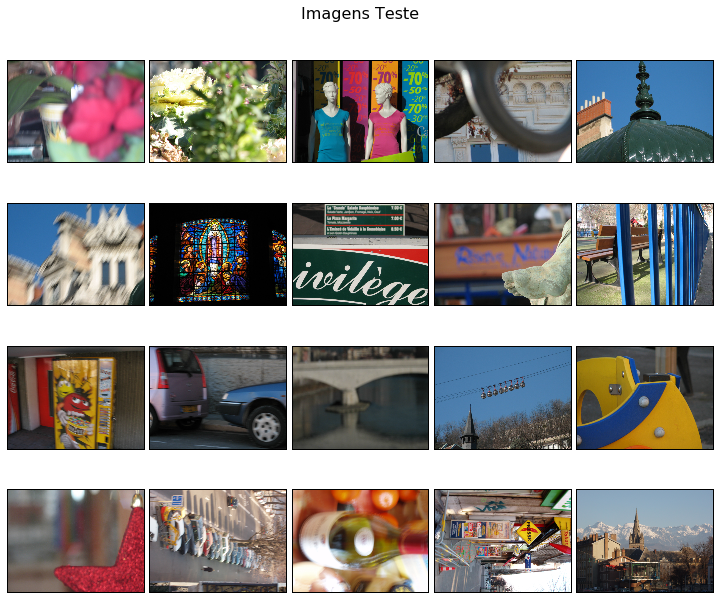

In [75]:
# plot_gallery('Par de imagens',[ a for i,a in enumerate(np_images)if i%2==0 ],len(np_images)/2,2)
np_images_test = [ a for i,a in enumerate(np_images)if i%2==0 ]
plot_gallery('Imagens Teste',np_images_test,5,4,np_images[0].shape)

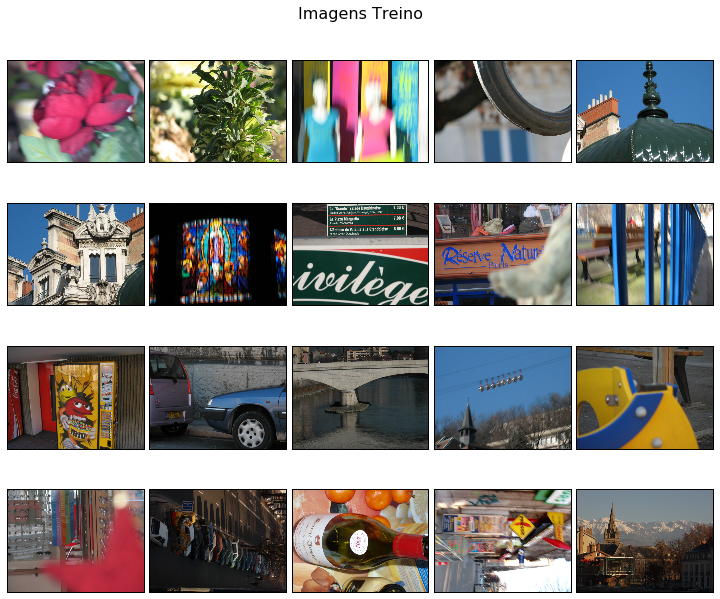

In [76]:
np_images_train = [ a for i,a in enumerate(np_images)if i%2!=0 ]
plot_gallery('Imagens Treino',np_images_train,5,4,np_images[0].shape)

In [108]:
import PIL
images = [ PIL.Image.open(f) for i,f in enumerate(glob('objects_16_bit/*/*.jpg')) if i%11==0  ]

def img2array(im):
    if im.mode != 'RGB':
        im = im.convert(mode='RGB')
    return np.fromstring(im.tobytes(), dtype='uint8').reshape((im.size[1], im.size[0], 3))

np_images_table1 = [ img2array(im) for im in images ]

20


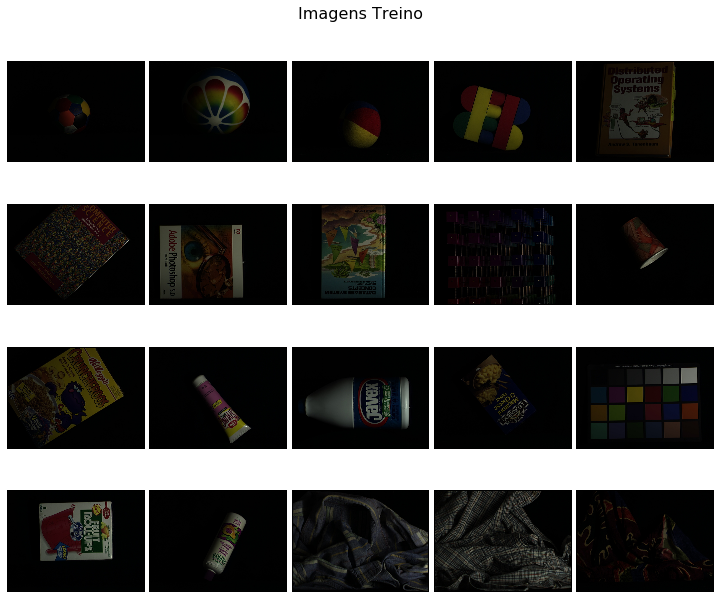

In [109]:
print(len(np_images_table2))
np_images_table1_train = np_images_table1
plot_gallery('Imagens Treino',np_images_table1_train,5,4,np_images_table1_train[0].shape)

20


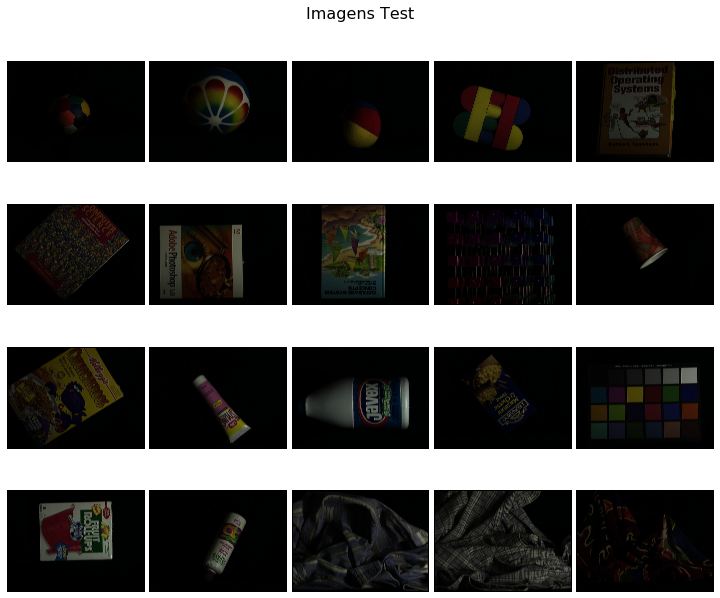

In [110]:
print(len(np_images_table2))
np_images_table1_test = map(lambda x: filters.gaussian_filter(x,(2,0,0),order=0),np_images_table1_train)
plot_gallery('Imagens Test',np_images_table1_test,5,4,np_images_table1_test[0].shape)

(480, 640, 3)


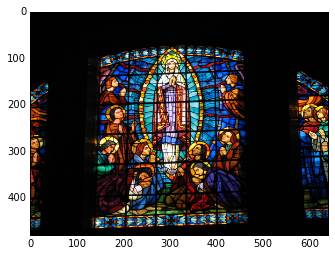

In [30]:
image_data_other = np_images[0]
print(image_data_other.shape)
plt.imshow(np_images_test[6])

(480, 640, 3)


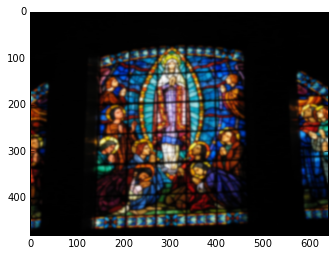

In [99]:
image_data_other = np_images[0]
print(image_data_other.shape)
plt.imshow(filters.gaussian_filter(np_images_test[6],(2,2,0), order=0))

(480, 640, 3)


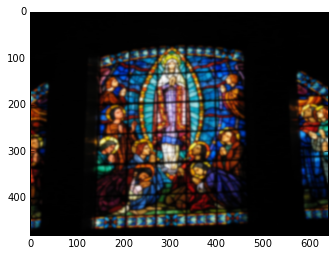

In [98]:
image_data_other = np_images[0]
print(image_data_other.shape)
plt.imshow(ndimage.gaussian_filter(np_images_test[6], sigma=(2, 2, 0), order=0))

In [35]:
def getHistogramP(image,logMethod=math.log,derivateMethod=filters.gaussian_laplace,sigma=2):
    
    image_R = image[:,:,0]
    image_G = image[:,:,1]
    image_B = image[:,:,2]
    ln_image_R = map(logMethod,image_R.ravel()+0.001)
    gaussina_laplace_ln_image_R =  derivateMethod(ln_image_R,sigma)

    ln_image_G = map(logMethod,image_G.ravel()+0.001)
    gaussina_laplace_ln_image_G =  derivateMethod(ln_image_G,sigma)

    ln_image_B = map(logMethod,image_B.ravel()+0.001)
    gaussina_laplace_ln_image_B =  derivateMethod(ln_image_B,sigma)
    
    data2 = np.vstack((gaussina_laplace_ln_image_R.flat, gaussina_laplace_ln_image_G.flat,
                       gaussina_laplace_ln_image_B.flat)).astype(np.float).T
    H, edges = np.histogramdd(data2, bins = (16, 16, 16),normed=False)

    return np.float32(cv2.normalize(H).flatten())

    
def getHistogramM(image,logMethod=math.log,derivateMethod=filters.gaussian_laplace,sigma=2):
    
    image_R = image[:,:,0]
    image_G = image[:,:,1]
    image_B = image[:,:,2]
    
    R = np.array(image_R.ravel()+0.0001,dtype=float)
    G = np.array(image_G.ravel()+0.0001,dtype=float)
    B = np.array(image_B.ravel()+0.0001,dtype=float)
    
    ln_image_R_divideG = map(logMethod,np.divide(R,G))
    gaussina_laplace_ln_image_R_divideG =  derivateMethod(ln_image_R_divideG,sigma)

    ln_image_B_divideG = map(logMethod,np.divide(B,G))
    gaussina_laplace_ln_image_B_divideG =  derivateMethod(ln_image_B_divideG,sigma)
    
    data2 = np.vstack((gaussina_laplace_ln_image_R_divideG.flat, gaussina_laplace_ln_image_B_divideG.flat)).astype(np.float).T
    H, edges = np.histogramdd(data2, bins = (16, 16),normed=False)
    return np.float32(cv2.normalize(H).flatten())

    
def getHistogramThip(image,logMethod=math.log,derivateMethod=filters.gaussian_laplace,sigma=2):
    
    image_R = image[:,:,0]
    image_G = image[:,:,1]
    image_B = image[:,:,2]
    
    
    R = np.array(image_R.ravel()+0.0001,dtype=float)
    G = np.array(image_G.ravel()+0.0001,dtype=float)
    B = np.array(image_B.ravel()+0.0001,dtype=float)
    
    ln_image_R = map(logMethod,R)
    gaussina_laplace_ln_image_R =  derivateMethod(ln_image_R,sigma)

    ln_image_G = map(logMethod,G)
    gaussina_laplace_ln_image_G =  derivateMethod(ln_image_G,sigma)

    ln_image_B = map(logMethod,B)
    gaussina_laplace_ln_image_B =  derivateMethod(ln_image_B,sigma)
    
    thip1 = np.array(map(lambda (x,y):math.atan2(x,y),zip(gaussina_laplace_ln_image_R,gaussina_laplace_ln_image_G)))
    thip2 = np.array(map(lambda (x,y):math.atan2(x,y),zip(gaussina_laplace_ln_image_G,gaussina_laplace_ln_image_B)))
    data2 = np.vstack((thip1.flat, thip2.flat)).astype(np.float).T
    H, edges = np.histogramdd(data2, bins = (16, 16),normed=False)
    return np.float32(cv2.normalize(H).flatten())
      
def getHistogramThipM(image,logMethod=math.log,derivateMethod=filters.gaussian_laplace,sigma=2):
    
    
    image_R = image[:,:,0]
    image_G = image[:,:,1]
    image_B = image[:,:,2]
    
    
    R = np.array(image_R.ravel()+0.0001,dtype=float)
    G = np.array(image_G.ravel()+0.0001,dtype=float)
    B = np.array(image_B.ravel()+0.0001,dtype=float)
    
    ln_image_R_divideG = map(logMethod,np.divide(R,G))
    gaussina_laplace_ln_image_R_divideG =  derivateMethod(ln_image_R_divideG,sigma)

    ln_image_B_divideG = map(logMethod,np.divide(G,B))
    gaussina_laplace_ln_image_B_divideG =  derivateMethod(ln_image_B_divideG,sigma)

    
    thipm = np.array(map(lambda (x,y):math.atan2(x,y),zip(gaussina_laplace_ln_image_R_divideG,gaussina_laplace_ln_image_B_divideG)))
    data2 = thipm.flat
    H, edges = np.histogramdd(data2, bins = (16),normed=False)
    return np.float32(cv2.normalize(H).flatten())

def getHistogramThipMWithDerivateAndSquare(image,logMethod=math.log,derivateMethod=filters.gaussian_laplace,sigma=2):
    
    image_R = image[:,:,0]
    image_G = image[:,:,1]
    image_B = image[:,:,2]
    
    R = np.array(image_R.ravel()+0.0001,dtype=float)
    G = np.array(image_G.ravel()+0.0001,dtype=float)
    B = np.array(image_B.ravel()+0.0001,dtype=float)
    
    
    ln_image_R_divideG = map(logMethod,np.divide(R,G))
    gaussina_laplace_ln_image_R_divideG =  derivateMethod(ln_image_R_divideG,sigma)
    ln_image_B_divideG = map(logMethod,np.divide(G,B))
    gaussina_laplace_ln_image_B_divideG =  derivateMethod(ln_image_B_divideG,sigma)
    
    thipm = np.array(map(lambda (x,y):math.atan2(x,y),zip(gaussina_laplace_ln_image_R_divideG,gaussina_laplace_ln_image_B_divideG)))
    
    gaussina_laplace_thipm =  derivateMethod(thipm,sigma)
    
#     upPart = map(lambda x:math.pow(x,2),derivateMethod(gaussina_laplace_ln_image_R_divideG,sigma))
#     bottonPart = map(lambda (x,y):math.sqrt(math.pow(x,2)+math.pow(y,2)),
#                      zip(gaussina_laplace_ln_image_R_divideG,gaussina_laplace_ln_image_B_divideG))

#     finalPart = np.array(map(lambda (x,y):x/(y+0000.1),zip(upPart,bottonPart)))
    finalPart = np.array(map(lambda x:math.pow(x,2),gaussina_laplace_thipm))

    data2 = finalPart.flat

    H, edges = np.histogramdd(data2, bins = (16),normed=False)
    return np.float32(cv2.normalize(H).flatten())
    

In [314]:
image1 = np_images[0]
image2 = np_images[1]

hist1_ = cv2.calcHist([image1], [0, 1,2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
hist1_ = cv2.normalize(hist1_).flatten()
# print(hist1_)

hist2_ = cv2.calcHist([image2], [0, 1,2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
hist2_ = cv2.normalize(hist2_).flatten()

d1 = cv2.compareHist(hist1_, hist2_, cv2.cv.CV_COMP_CORREL)
d2 = cv2.compareHist(hist1_, hist2_, cv2.cv.CV_COMP_CHISQR)
d3 = cv2.compareHist(hist1_, hist2_, cv2.cv.CV_COMP_INTERSECT)
d4 = cv2.compareHist(hist1_, hist2_, cv2.cv.CV_COMP_BHATTACHARYYA)

print(d1,d2,d3,d4)

0.758356907602 142.994398729 3.64379349771 0.32908684464


In [315]:
image1 = np_images[0]
image2 = np_images[1]

data1 = np.vstack((image1[:,:,0].flat, image1[:,:,1].flat, image1[:,:,2].flat)).astype(np.float).T
# print(data1.shape)
H, edges = np.histogramdd(data1, bins = (8, 8, 8),normed=False,range=((0,256),(0,256),(0,256)))
hist1_ = np.float32(cv2.normalize(H).flatten())
#np.float32(np.ravel(H))
# print(hist1_)

data2 = np.vstack((image2[:,:,0].flat, image2[:,:,1].flat, image2[:,:,2].flat)).astype(np.float).T
H, edges = np.histogramdd(data2, bins = (8, 8, 8),normed=True,range=((0,256),(0,256),(0,256)))
hist2_ = np.float32(cv2.normalize(H).flatten())
#np.float32(np.ravel(H))


d1 = cv2.compareHist(hist1_, hist2_, cv2.cv.CV_COMP_CORREL)
d2 = cv2.compareHist(hist1_, hist2_, cv2.cv.CV_COMP_CHISQR)
d3 = cv2.compareHist(hist1_, hist2_, cv2.cv.CV_COMP_INTERSECT)
d4 = cv2.compareHist(hist1_, hist2_, cv2.cv.CV_COMP_BHATTACHARYYA)


print(d1,d2,d3,d4)

0.758356909017 142.99441829 3.64379357981 0.329086843007


In [316]:
image1 = np_images[0]
image2 = np_images[1]

hist1 = getHistogramP(image1)

hist2 = getHistogramP(image2)
d1 = cv2.compareHist(hist1, hist2, cv2.cv.CV_COMP_CORREL)
d2 = cv2.compareHist(hist1, hist2, cv2.cv.CV_COMP_CHISQR)
d3 = cv2.compareHist(hist1, hist2, cv2.cv.CV_COMP_INTERSECT)
d4 = cv2.compareHist(hist1, hist2, cv2.cv.CV_COMP_BHATTACHARYYA)

print(d1,d2,d3,d4)

0.0678812070995 40.8723720796 0.151920867688 0.80890699855


Calculando a distancia Euclidiana Com diversos Métodos!
---------------

##### Sem método, apenas o histograma 3D dos canais RGB

In [317]:
image1 = np_images[0]
image2 = np_images[1]

hist1_ = cv2.calcHist([image1], [0, 1,2], None, [16, 16, 16],[0, 256, 0, 256, 0, 256])
hist1_ = cv2.normalize(hist1_).flatten()
# print(hist1_)

hist2_ = cv2.calcHist([image2], [0, 1,2], None, [16, 16, 16],[0, 256, 0, 256, 0, 256])
hist2_ = cv2.normalize(hist2_).flatten()


d1 = dist.euclidean(hist1_, hist2_)
d2 = dist.cityblock(hist1_, hist2_)
d3 = dist.chebyshev(hist1_, hist2_)

print(d1,d2,d3)

0.832354187965 9.34544 0.297269


##### Histogram P log derivate 3D

In [318]:
image1 = np_images[0]
image2 = np_images[1]

hist1 = getHistogramP(image1)

hist2 = getHistogramP(image2)

d1 = dist.euclidean(hist1, hist2)
d2 = dist.cityblock(hist1, hist2)
d3 = dist.chebyshev(hist1, hist2)

print(d1,d2,d3)

1.36482906342 3.30395 0.895765


##### Histogram M  R/B e G/B e log com derivate 2D

In [319]:
image1 = np_images[0]
image2 = np_images[1]

hist1 = getHistogramM(image1)

hist2 = getHistogramM(image2)

d1 = dist.euclidean(hist1, hist2)
d2 = dist.cityblock(hist1, hist2)
d3 = dist.chebyshev(hist1, hist2)

print(d1,d2,d3)

1.3144299984 2.95528 0.921525


##### Histogram Thip  tan2 R/B e tan2 G/B  com log com derivate 2D

In [320]:
image1 = np_images[0]
image2 = np_images[1]

hist1 = getHistogramThip(image1)

hist2 = getHistogramThip(image2)

d1 = dist.euclidean(hist1, hist2)
d2 = dist.cityblock(hist1, hist2)
d3 = dist.chebyshev(hist1, hist2)

print(d1,d2,d3)

0.18172313273 1.23937 0.0687299


##### Histogram ThipM  tan2  R/B e G/B e log com derivate 1D

In [321]:
image1 = np_images[0]
image2 = np_images[1]

hist1 = getHistogramThipM(image1)

hist2 = getHistogramThipM(image2)

d1 = dist.euclidean(hist1, hist2)
d2 = dist.cityblock(hist1, hist2)
d3 = dist.chebyshev(hist1, hist2)

print(d1,d2,d3)

0.173963665962 0.595428 0.0998908


##### Histogram ThipM  sqrt / tan2  R/B e G/B e log com derivate 1D

In [322]:
image1 = np_images[0]
image2 = np_images[1]

hist1 = getHistogramThipMWithDerivateAndSquare(image1)

hist2 = getHistogramThipMWithDerivateAndSquare(image2)

d1 = dist.euclidean(hist1, hist2)
d2 = dist.cityblock(hist1, hist2)
d3 = dist.chebyshev(hist1, hist2)

print(d1,d2,d3)


0.000391829264117 0.000488918 0.000387729


In [323]:
print(len(np_images_train))
print(len(np_images_test))

20
20


In [153]:
#Computing histogram
def computeHistogram(train,test,method,*args):
    train_histo = {}
    test_histo = {}

    for i,imageTrain in enumerate(train):
        train_histo[i]= method(imageTrain,*args)
    for i,imageTest in enumerate(test):
        test_histo[i]= method(imageTest,*args)
    
    return train_histo,test_histo

def calcRanks(train_histogram_dict,test_histogram_dict,nr=1):
    allTestRanked = []
    for test_id in test_histogram_dict:
        allDistances=[]
        for train_id in train_histogram_dict:
            d = dist.euclidean(train_histogram_dict[train_id], test_histogram_dict[test_id])
            allDistances.append((train_id,d))
        allDistances = sorted(allDistances,key=lambda x:x[1],reverse=False)
        allTestRanked.append((test_id,[ i+1 for i,(x,d) in enumerate(allDistances) if  x in range(test_id*nr,test_id*nr+nr)[:nr]]))
    return allTestRanked



In [130]:
train_histo,test_histo = computeHistogram(np_images_train,np_images_test,getHistogramThipMWithDerivateAndSquare)

allTestRanked = calcRanks(train_histo,test_histo)
allTestRanked
    

[(0, [8]),
 (1, [1]),
 (2, [1]),
 (3, [4]),
 (4, [2]),
 (5, [10]),
 (6, [1]),
 (7, [9]),
 (8, [12]),
 (9, [13]),
 (10, [15]),
 (11, [8]),
 (12, [2]),
 (13, [2]),
 (14, [3]),
 (15, [2]),
 (16, [13]),
 (17, [12]),
 (18, [2]),
 (19, [1])]

[  9.99999940e-01   3.48462665e-04   6.83898688e-05   1.95399625e-05
   6.51332084e-06   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   3.25666042e-06]
[  9.99999523e-01   9.80985933e-04   1.14068134e-04   5.86636124e-05
   1.62954475e-05   0.00000000e+00   3.25908968e-06   3.25908968e-06
   3.25908968e-06   0.00000000e+00   3.25908968e-06   3.25908968e-06
   0.00000000e+00   3.25908968e-06   0.00000000e+00   3.25908968e-06]


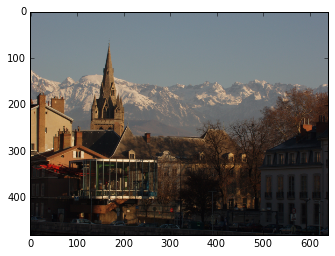

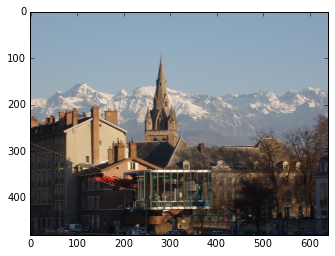

In [475]:
plt.figure()
plt.imshow(np_images_train[test_id])
plt.figure()
plt.imshow(np_images_test[test_id])
print(test_histo[test_id])
print(train_histo[test_id])

Metrica Utilizada
----------------

In [476]:
ANARTest = [(0, [1]),
 (1, [1]),
 (2, [1]),
 (3, [1]),
 (4, [1]),
 (5, [1]),
 (6, [1]),
 (7, [1]),
 (8, [1]),
 (9, [1]),
 (10, [1]),
 (11, [1]),
 (12, [1]),
 (13, [1]),
 (14, [1]),
 (15, [1]),
 (16, [2]),
 (17, [2]),
 (18, [2]),
 (19, [5])]
ANARTest2 = [(0, [1]),
 (1, [1]),
 (2, [1]),
 (3, [1]),
 (4, [1]),
 (5, [1]),
 (6, [1]),
 (7, [1]),
 (8, [1]),
 (9, [1]),
 (10, [1]),
 (11, [1]),
 (12, [1]),
 (13, [1]),
 (14, [1]),
 (15, [1]),
 (16, [1]),
 (17, [1]),
 (18, [1]),
 (19, [2])]

In [179]:
def nar(ranks,n):
    result = 0
    nr = len(ranks)
    for (ri) in ranks:
        result += ri-((nr*(nr+1))/2)
    result*=(1/(n*nr))
    
    return result
def anar(allRanks):
    n = len(allRanks)*len(allTestRanked[0][1])
    return scipy.mean(map(lambda (x,y):nar(y,n),allRanks))


Esta correto no artigo Tabela 1 e Tabela 2
----------------------

In [478]:
r = anar(ANARTest)
print("%.3f"%r)

r = anar(ANARTest2)
print("%.3f"%r)




0.018
0.003


Replicando Experimento
---------------------

In [479]:
r = anar(allTestRanked)
print("%.3f"%r)

0.480


P Tabela 3
----------

In [519]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramP,math.log,filters.gaussian_gradient_magnitude)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_gradient_magnitude %.3f"%r)


gaussian_gradient_magnitude 0.143


In [525]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramP,math.log,filters.gaussian_laplace)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_laplace %.3f"%r)


gaussian_laplace 0.383


In [521]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramP,math.log,filters.gaussian_filter)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_filter %.3f"%r)


gaussian_filter 0.083


In [526]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramP,math.log,filters.gaussian_filter1d)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_filter %.3f"%r)


gaussian_filter 0.083


M Tabela 3
----------

In [528]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramM,math.log,filters.gaussian_gradient_magnitude)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_gradient_magnitude %.3f"%r)


gaussian_gradient_magnitude 0.320


In [529]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramM,math.log,filters.gaussian_laplace)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_laplace %.3f"%r)


gaussian_laplace 0.350


In [530]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramM,math.log,filters.gaussian_filter)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_filter %.3f"%r)


gaussian_filter 0.245


In [531]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramM,math.log,filters.gaussian_filter1d)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_filter %.3f"%r)


gaussian_filter 0.245


Thi p Tabela 3
----------

In [537]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramThip,math.log,filters.gaussian_gradient_magnitude)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_gradient_magnitude %.3f"%r)


gaussian_gradient_magnitude 0.037


In [538]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramThip,math.log,filters.gaussian_laplace)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_laplace %.3f"%r)


gaussian_laplace 0.035


In [539]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramThip,math.log,filters.gaussian_filter)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_filter %.3f"%r)


gaussian_filter 0.307


In [540]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramThip,math.log,filters.gaussian_filter1d)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_filter %.3f"%r)


gaussian_filter 0.307


Thi M Tabela 3
----------

In [568]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramThipM,math.log,filters.gaussian_gradient_magnitude)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_gradient_magnitude %.3f"%r)


gaussian_gradient_magnitude 0.053


In [569]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramThipM,math.log,filters.gaussian_laplace)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_laplace %.3f"%r)


gaussian_laplace 0.035


In [570]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramThipM,math.log,filters.gaussian_filter)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_filter %.3f"%r)


gaussian_filter 0.003


In [571]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramThipM,math.log,filters.gaussian_filter1d)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_filter %.3f"%r)


gaussian_filter 0.003


Thi M Squared Tabela 3
----------

In [564]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramThipMWithDerivateAndSquare,math.log,filters.gaussian_gradient_magnitude)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_gradient_magnitude %.3f"%r)


gaussian_gradient_magnitude 0.160


In [565]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramThipMWithDerivateAndSquare,math.log,filters.gaussian_laplace)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_laplace %.3f"%r)


gaussian_laplace 0.253


In [566]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramThipMWithDerivateAndSquare,math.log,filters.gaussian_filter)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_filter %.3f"%r)


gaussian_filter 0.040


In [567]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramThipMWithDerivateAndSquare,math.log,filters.gaussian_filter1d)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("gaussian_filter %.3f"%r)


gaussian_filter 0.040


Tabela 1
--------

In [111]:
train_histoP,test_histoP = computeHistogram(np_images_table1_train,np_images_table1_test,getHistogramP,math.log,filters.gaussian_laplace)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("P 3D gaussian_laplace %.3f"%r)


P 3D gaussian_laplace 0.425


In [112]:
train_histoP,test_histoP = computeHistogram(np_images_table1_train,np_images_table1_test,getHistogramM,math.log,filters.gaussian_laplace)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("M 2D gaussian_laplace %.3f"%r)


M 2D gaussian_laplace 0.483


In [113]:
train_histoP,test_histoP = computeHistogram(np_images_table1_train,np_images_table1_test,getHistogramThip,math.log,filters.gaussian_laplace)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("Thi P 2D gaussian_laplace %.3f"%r)


Thi P 2D gaussian_laplace 0.175


In [114]:
train_histoP,test_histoP = computeHistogram(np_images_table1_train,np_images_table1_test,getHistogramThipM,math.log,filters.gaussian_laplace)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("Thi M 1D gaussian_laplace %.3f"%r)


Thi M 1D gaussian_laplace 0.288


Tabela 3
---------

In [80]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramP,math.log,filters.gaussian_laplace)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("P 3D gaussian_laplace %.3f"%r)


P 3D gaussian_laplace 0.383


In [81]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramM,math.log,filters.gaussian_laplace)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("M 2D gaussian_laplace %.3f"%r)


M 2D gaussian_laplace 0.468


In [82]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramThip,math.log,filters.gaussian_laplace)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("Thi P 2D gaussian_laplace %.3f"%r)


Thi P 2D gaussian_laplace 0.035


In [83]:
train_histoP,test_histoP = computeHistogram(np_images_train,np_images_test,getHistogramThipM,math.log,filters.gaussian_laplace)
allTestRanked = calcRanks(train_histoP,test_histoP)
r = anar(allTestRanked)
print("Thi M 1D gaussian_laplace %.3f"%r)


Thi M 1D gaussian_laplace 0.035


Tabela 2
---------

In [1]:
import PIL
images = [ PIL.Image.open(f) for i,f in enumerate(glob('objects_16_bit/*/*.jpg')) ]

def img2array(im):
    if im.mode != 'RGB':
        im = im.convert(mode='RGB')
    return np.fromstring(im.tobytes(), dtype='uint8').reshape((im.size[1], im.size[0], 3))



NameError: name 'glob' is not defined

In [23]:
np_images_table2_test = [ img2array(im) for i,im in enumerate(images) if i%11==0 ]
np_images_table2_train = [ img2array(im) for i,im in enumerate(images) if i%11!=0 ]
print(len(np_images_table2_test))
print(len(np_images_table2_train))

20
200


In [175]:
test_histoP,train_histoP = computeHistogram(np_images_table2_test,np_images_table2_train,getHistogramP,math.log,filters.gaussian_laplace)
allTestRanked = calcRanks(train_histoP,test_histoP,10)
r = anar(allTestRanked)
print("P 3D gaussian_laplace %.3f"%r)


200 2
P 3D gaussian_laplace 0.170


In [176]:
test_histoP,train_histoP = computeHistogram(np_images_table2_test,np_images_table2_train,getHistogramM,math.log,filters.gaussian_laplace)
allTestRanked = calcRanks(train_histoP,test_histoP,10)
r = anar(allTestRanked)
print("M 2D gaussian_laplace %.3f"%r)


200 2
M 2D gaussian_laplace 0.190


In [177]:
test_histoP,train_histoP = computeHistogram(np_images_table2_test,np_images_table2_train,getHistogramThip,math.log,filters.gaussian_laplace)
allTestRanked = calcRanks(train_histoP,test_histoP,10)
r = anar(allTestRanked)
print("Thi P 2D gaussian_laplace %.3f"%r)



200 2
Thi P 2D gaussian_laplace 0.164


In [178]:
test_histoP,train_histoP = computeHistogram(np_images_table2_test,np_images_table2_train,getHistogramThipM,math.log,filters.gaussian_laplace)
allTestRanked = calcRanks(train_histoP,test_histoP,10)
r = anar(allTestRanked)
print("Thi M 1D gaussian_laplace %.3f"%r)


200 2
Thi M 1D gaussian_laplace 0.122


RBM como descritor 
-------

In [34]:
from __future__ import division

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from glob import glob
import scipy

from scipy.spatial.distance import cdist,pdist,squareform
import scipy.spatial.distance as dist

from sklearn.linear_model import LogisticRegressionCV
IMAGE_TO_DISPLAY=10

SIZE_BLOCK = 10000

In [2]:
import PIL
images = [ PIL.Image.open(f) for i,f in enumerate(glob('objects_16_bit/*/*.jpg')) ]

def img2array(im):
    if im.mode != 'L':
        im = im.convert(mode='L')
    return np.fromstring(im.tobytes(), dtype='uint8').reshape((im.size[1], im.size[0]))


In [3]:
np_images_table2_test = np.array([ img2array(im).flatten() for i,im in enumerate(images) if i%11==0 ])
np_images_table2_train = np.array([ img2array(im).flatten() for i,im in enumerate(images) if i%11!=0 ])
print(len(np_images_table2_test))
print(len(np_images_table2_train))

20
200


(298116,)


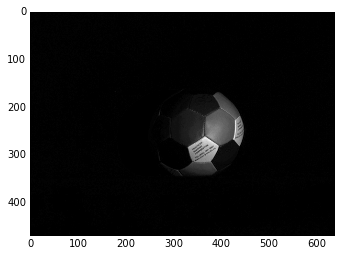

In [4]:
image_data_other = np_images_table2_train[0]
print(image_data_other.shape)
plt.imshow(image_data_other.reshape((468,637)),cmap='gray')

In [5]:
# # Scaling between 0 and 1
# np_images_table2_train = (np_images_table2_train - np.min(np_images_table2_train, 0)) / (np.max(np_images_table2_train, 0) + 0.0001)  # 0-1 scaling
# # Convert to binary images
# np_images_table2_train = np_images_table2_train > 0.5


In [12]:
rbmNoSup = BernoulliRBM(n_components=64, learning_rate=0.01, batch_size=10, n_iter=40, verbose=True, random_state=None)


Tabela 2
-----------

In [10]:
np_images_table2_train.ndim 


2

In [15]:
batch_size = 10
initial = 0
while(initial<len(np_images_table2_train)):
    rbm_train = np_images_table2_train[initial:][0:batch_size]
    # Scaling between 0 and 1
    rbm_train = (rbm_train - np.min(rbm_train, 0)) / (np.max(rbm_train, 0) + 0.0001)  # 0-1 scaling
    # Convert to binary images
    rbm_train = rbm_train > 0.5
    rbmNoSup.partial_fit(rbm_train)
    initial += batch_size

In [37]:
def computeRBM(images):
    rbmTrasnform = {}
        
    images = (images - np.min(images, 0)) / (np.max(images, 0) + 0.0001)  # 0-1 scaling
    images = images > 0.5
    rbmResponse = rbmNoSup.transform(images)

    for i,response in enumerate(rbmResponse):
        rbmTrasnform[i]= response
    return rbmTrasnform

def calcRanks(train_histogram_dict,test_histogram_dict,nr=1):
    allTestRanked = []
    for test_id in test_histogram_dict:
        allDistances=[]
        for train_id in train_histogram_dict:
            d = dist.euclidean(train_histogram_dict[train_id], test_histogram_dict[test_id])
            allDistances.append((train_id,d))
        allDistances = sorted(allDistances,key=lambda x:x[1],reverse=False)
        allTestRanked.append((test_id,[ i+1 for i,(x,d) in enumerate(allDistances) if  x in range(test_id*nr,test_id*nr+nr)[:nr]]))
    return allTestRanked

def nar(ranks,n):
    result = 0
    nr = len(ranks)
    for (ri) in ranks:
        result += ri-((nr*(nr+1))/2)
    result*=(1/(n*nr))
    
    return result
def anar(allRanks):
    n = len(allRanks)*len(allTestRanked[0][1])
    return scipy.mean(map(lambda (x,y):nar(y,n),allRanks))


In [36]:
test_histoP = computeRBM(np_images_table2_test)
train_histoP = computeRBM(np_images_table2_train) 

allTestRanked = calcRanks(train_histoP,test_histoP,10)
r = anar(allTestRanked)
print("RBM %.3f"%r)


RBM 0.000


In [38]:
allTestRanked
r = anar(allTestRanked)
r

0.18395